In [29]:
import streamlit as st
import pandas as pd
import numpy as np
import pickle
from pathlib import Path
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose
from prophet import Prophet
from bs4 import BeautifulSoup
import requests
import time
from csv import writer
from datetime import datetime, timedelta
import emoji
# import streamlit_authenticator as stauth 
import schedule     

In [30]:
# Fungsi untuk melakukan scraping data
def scrape_data(start_date, end_date):
    bulan = {
        1: "Januari",
        2: "Februari",
        3: "Maret",
        4: "April",
        5: "Mei",
        6: "Juni",
        7: "Juli",
        8: "Agustus",
        9: "September",
        10: "Oktober",
        11: "November",
        12: "Desember"
    }
    data_list = []
    for date in pd.date_range(start_date, end_date):
        month_name_id = bulan[date.month]
        url_day = f"https://harga-emas.org/history-harga/{date.year}/{month_name_id}/{date.day}/"
        page = requests.get(url_day)
        soup = BeautifulSoup(page.content, 'html.parser')
        lists = soup.find('div', class_='col-md-8')
        row_data = [date.strftime('%Y-%m-%d')]
        index = 0
        for item in lists.findAll('tr'):
            index += 1
            if index == 21:
                base_value = item.findAll('b')
                index_core = 0
                for core in base_value:
                    index_core += 1
                    if index_core == 2:
                        value = core.text.split('+')[0].split('-')[0].split('(')[0]
                        value = value.replace('.', '').strip()
                        value = value.replace('Rp', '').strip()
                        value = value.replace('/', '').strip()
                        value = value.replace('gram', '').strip()
                        row_data.append(value)
        data_list.append(row_data)
        time.sleep(1)  # Jeda untuk mencegah terlalu banyak permintaan ke website
    return data_list

In [31]:
def save_to_csv(data_list, file_name):
    with open(file_name, 'a', newline='') as file:
        csv_writer = writer(file)
        csv_writer.writerows(data_list)

In [32]:
def scrape_dan_simpan():
    # Baca tanggal terakhir dari file CSV
    file_name = 'data/buy_1gr.csv'
    df5 = pd.read_csv(file_name)
    last_date_str = df5.iloc[-1]['Tanggal']
    last_date = datetime.strptime(last_date_str, '%Y-%m-%d').date()
        
    start_date = last_date + timedelta(days=1)
    end_date = datetime.now().date()
        
    if start_date <= end_date:
        # Scraping data dan menyimpannya ke dalam file CSV
        data_list = scrape_data(start_date, end_date)
        save_to_csv(data_list, file_name)

In [33]:
# Load data
df = pd.read_csv('data/buy_1gr.csv')
df['Tanggal'] = pd.to_datetime(df['Tanggal'])
df['Tanggal'] = df['Tanggal'].dt.date
df.set_index('Tanggal', inplace=True)
df['Harga'] = (df['Pricebuy'])
print(df.dtypes)
df.head(5)

Pricebuy    int64
Harga       int64
dtype: object


,Pricebuy,Harga
Tanggal,,
2022-01-01,833000,833000
2022-01-02,833000,833000
2022-01-03,833000,833000
2022-01-04,833000,833000
2022-01-05,833000,833000


In [34]:
#load data lagi
df2 = pd.read_csv('data/buy_1gr.csv')
df2['Tanggal'] = pd.to_datetime(df2['Tanggal'])
df2.set_index('Tanggal', inplace=True)
print(df2.dtypes)
df2.head(5)

Pricebuy    int64
dtype: object


,Pricebuy
Tanggal,
2022-01-01,833000
2022-01-02,833000
2022-01-03,833000
2022-01-04,833000
2022-01-05,833000


In [35]:
data_set = df2.iloc[:, 0:1] #.values
pd.set_option('display.max_columns', None)

data_set.head(5)

,Pricebuy
Tanggal,
2022-01-01,833000
2022-01-02,833000
2022-01-03,833000
2022-01-04,833000
2022-01-05,833000


In [36]:
# Learning / Preprocessing data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(data_set)
print(data_set_scaled)

[[0.08705357]
 [0.08705357]
 [0.08705357]
 [0.08705357]
 [0.08705357]
 [0.08705357]
 [0.08705357]
 [0.08705357]
 [0.08705357]
 [0.08705357]
 [0.08705357]
 [0.08705357]
 [0.08705357]
 [0.08705357]
 [0.08705357]
 [0.08705357]
 [0.09375   ]
 [0.09375   ]
 [0.09375   ]
 [0.09375   ]
 [0.12053571]
 [0.12053571]
 [0.11830357]
 [0.11607143]
 [0.11607143]
 [0.13169643]
 [0.10491071]
 [0.10491071]
 [0.10491071]
 [0.08035714]
 [0.078125  ]
 [0.078125  ]
 [0.08705357]
 [0.08928571]
 [0.08928571]
 [0.09375   ]
 [0.09375   ]
 [0.09821429]
 [0.09821429]
 [0.11383929]
 [0.11383929]
 [0.11383929]
 [0.11383929]
 [0.11383929]
 [0.140625  ]
 [0.14955357]
 [0.14955357]
 [0.140625  ]
 [0.140625  ]
 [0.140625  ]
 [0.17857143]
 [0.1875    ]
 [0.1875    ]
 [0.1875    ]
 [0.19419643]
 [0.19419643]
 [0.19419643]
 [0.19419643]
 [0.19866071]
 [0.19642857]
 [0.21875   ]
 [0.21875   ]
 [0.21875   ]
 [0.21875   ]
 [0.26339286]
 [0.28125   ]
 [0.29464286]
 [0.33258929]
 [0.33258929]
 [0.27455357]
 [0.27232143]
 [0.27

In [37]:
# Multiple features from data provided to the model
X = []
backcandles = 30 # Jumlah hari mundur / kebelakang
print(data_set_scaled.shape[0])
for j in range(1): # jumlah kolom = 8
  X.append([])
  for i in range(backcandles, data_set_scaled.shape[0]):
    X[j].append(data_set_scaled[i - backcandles:i, j])

X = np.moveaxis(X, [0], [2])

# -1 untuk memilih kolom terakhir
X, yi = np.array(X), np.array(data_set_scaled[backcandles:, -1])
y=np.reshape(yi,(len(yi),1))
# y = yi.reshape(-1, 1)

print(X.shape)
print(y)
print(y.shape)

845
(815, 30, 1)
[[0.078125  ]
 [0.078125  ]
 [0.08705357]
 [0.08928571]
 [0.08928571]
 [0.09375   ]
 [0.09375   ]
 [0.09821429]
 [0.09821429]
 [0.11383929]
 [0.11383929]
 [0.11383929]
 [0.11383929]
 [0.11383929]
 [0.140625  ]
 [0.14955357]
 [0.14955357]
 [0.140625  ]
 [0.140625  ]
 [0.140625  ]
 [0.17857143]
 [0.1875    ]
 [0.1875    ]
 [0.1875    ]
 [0.19419643]
 [0.19419643]
 [0.19419643]
 [0.19419643]
 [0.19866071]
 [0.19642857]
 [0.21875   ]
 [0.21875   ]
 [0.21875   ]
 [0.21875   ]
 [0.26339286]
 [0.28125   ]
 [0.29464286]
 [0.33258929]
 [0.33258929]
 [0.27455357]
 [0.27232143]
 [0.27232143]
 [0.25446429]
 [0.23660714]
 [0.20535714]
 [0.20982143]
 [0.22321429]
 [0.20758929]
 [0.20758929]
 [0.20535714]
 [0.21875   ]
 [0.20758929]
 [0.23214286]
 [0.24553571]
 [0.24330357]
 [0.24330357]
 [0.24330357]
 [0.21205357]
 [0.21205357]
 [0.21651786]
 [0.22098214]
 [0.21205357]
 [0.21205357]
 [0.21205357]
 [0.21875   ]
 [0.20758929]
 [0.21205357]
 [0.22098214]
 [0.234375  ]
 [0.234375  ]
 [0

In [38]:
# Split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)

X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y.shape)

652
(652, 30, 1)
(163, 30, 1)
(652, 1)
(163, 1)
(815, 1)


X_train shape: (652, 30, 1)
X_train dtype: float64
y_train shape: (652, 1)
y_train dtype: float64
Epoch 1/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - loss: 0.0144 - val_loss: 0.0070
Epoch 2/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0011 - val_loss: 0.0055
Epoch 3/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 7.2956e-04 - val_loss: 0.0056
Epoch 4/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 7.9404e-04 - val_loss: 0.0051
Epoch 5/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 6.7959e-04 - val_loss: 0.0050
Epoch 6/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 7.5418e-04 - val_loss: 0.0048
Epoch 7/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 8.3616e-04 - val_loss: 0.0042
Epoch 8/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 7.6757e-04 - val_loss: 0.0040
Epoch 9/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 5.9420e-04 - val_loss: 0.0039
Epoch 10/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 6.0586e-04 - val_loss: 0.0037
Epoch 11/30
40/40 ━

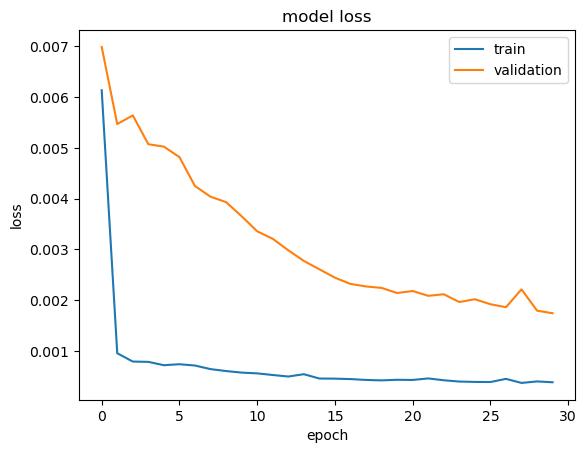

In [39]:
from keras.models import Sequential

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate, TimeDistributed
import numpy as np
import matplotlib.pyplot as plt

# backcandles = 30

lstm_input = Input(shape=(backcandles, 1), name="lstm_input")
inputs = LSTM(150, name="first_layer")(lstm_input)
inputs = Dense(1, name="dense_layer")(inputs)
output = Activation('linear', name="output")(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')

print("X_train shape:", X_train.shape)
print("X_train dtype:", X_train.dtype)
print("y_train shape:", y_train.shape)
print("y_train dtype:", y_train.dtype)

model_test = model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split=0.1)

plt.plot(model_test.history['loss'])
plt.plot(model_test.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [40]:
# Prediction
y_pred = model.predict(X_test)
for i in range(10):
  print(y_pred[i], y_test[i])

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step
[0.4262907] [0.42857143]
[0.42749304] [0.44642857]
[0.4351834] [0.44419643]
[0.4408105] [0.44196429]
[0.44318503] [0.453125]
[0.44861585] [0.453125]
[0.45255548] [0.44642857]
[0.45170617] [0.44419643]
[0.448869] [0.44866071]
[0.44849443] [0.44642857]


In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# MSE
mse = mean_squared_error(y_test, y_pred)
print("MSE score: ", mse)

# RMSE
rmse = np.sqrt(mse)
print("RMSE score: ", rmse)

# MAE
mae = mean_absolute_error(y_test, y_pred)
print("MAE score: ", mae)

#R2
r2 = r2_score(y_test, y_pred)
print("r2_score: ", r2)

def mean_absolute_percentage_error(y_test, y_pred):
    return np.mean(np.abs((y_test - y_pred) / y_pred)) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)
print("MAPE: ", mape, "%")

MSE score:  0.0020691889000851674
RMSE score:  0.04548833806686245
MAE score:  0.022651081775804043
r2_score:  0.9328528216395636
MAPE:  4.547828898233338 %


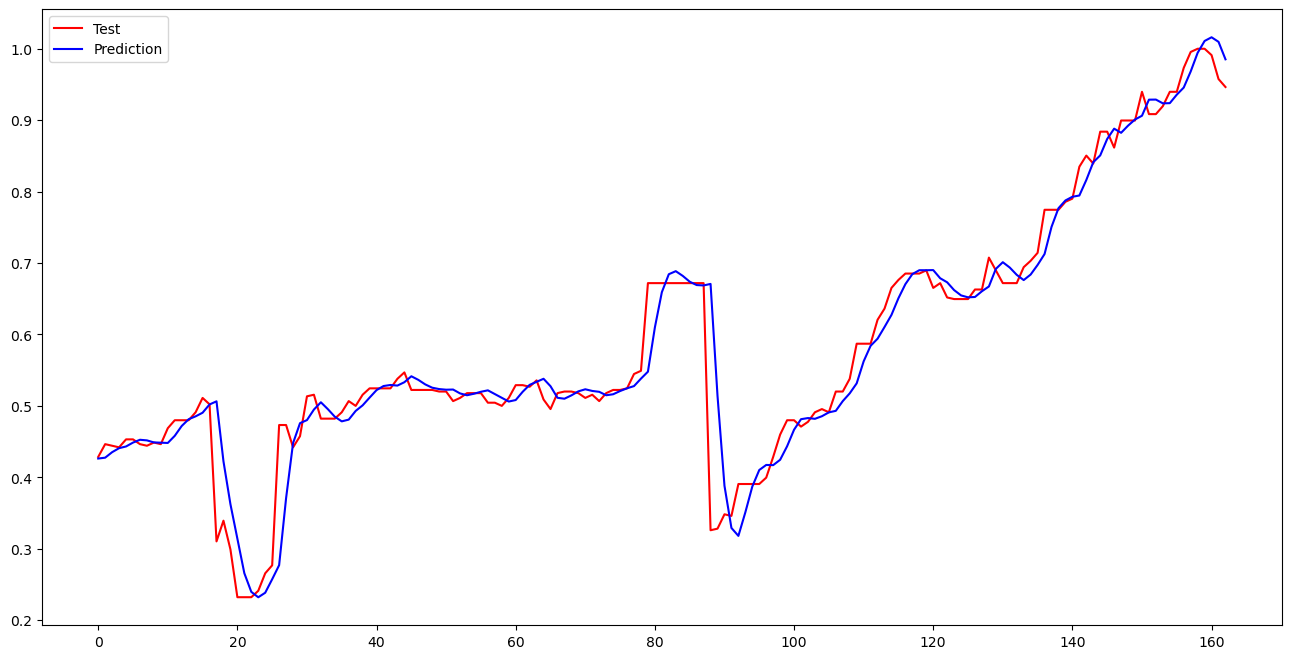

In [42]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color="red", label="Test")
plt.plot(y_pred, color="blue", label="Prediction")
plt.legend()
plt.show()